### Importing Libraries

In [86]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model using statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import levene, ttest_ind, f_oneway, kruskal, shapiro, kstest
from scipy.stats import chi2_contingency

# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read the Dataset

In [87]:
df = pd.read_csv("./bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [88]:
numeric_data = df[df.select_dtypes(exclude='object').columns.tolist() + ["class"]]
categorical_data = df[df.select_dtypes(include='object').columns.tolist() + ["class"]]


print(numeric_data.shape)
print(categorical_data.shape)

(13393, 11)
(13393, 3)


### Statistical Test: Continuous Variables
- Independence of observations
- No Outliers
- Normality (Shapiro, QQ-plots)
- Homogeneity (Levene test)

In [89]:
# Create an empty dictionary to store results assuming not normal distribution
result_dict = {'Variable': [], 'Data_Type': [], 'Type_of_Test': [], 'P-value': []}

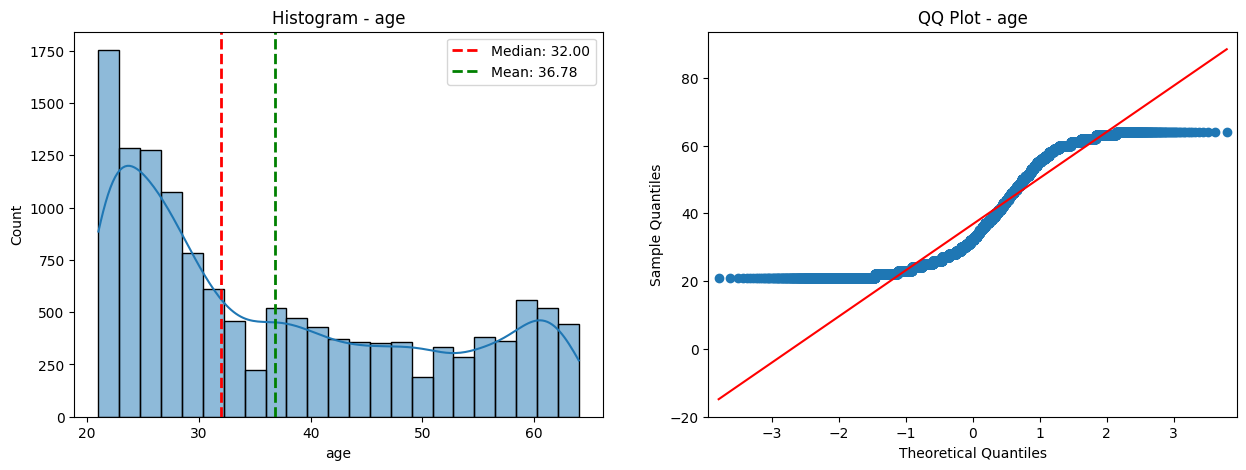

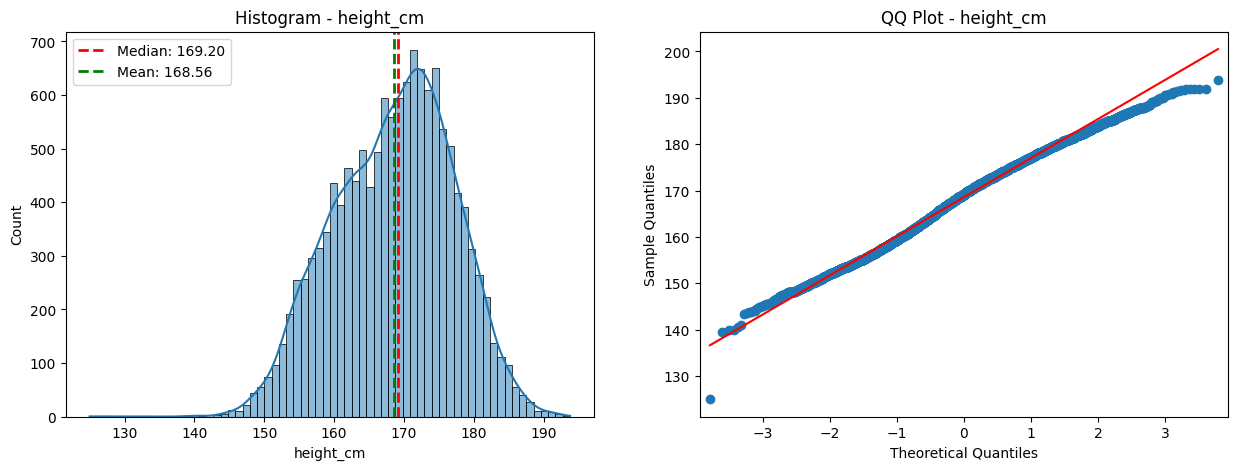

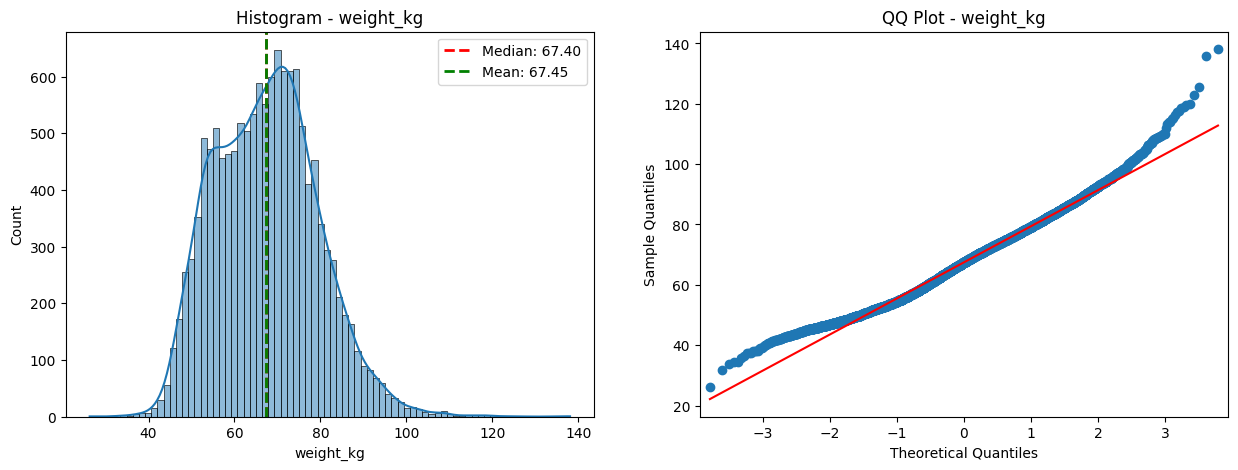

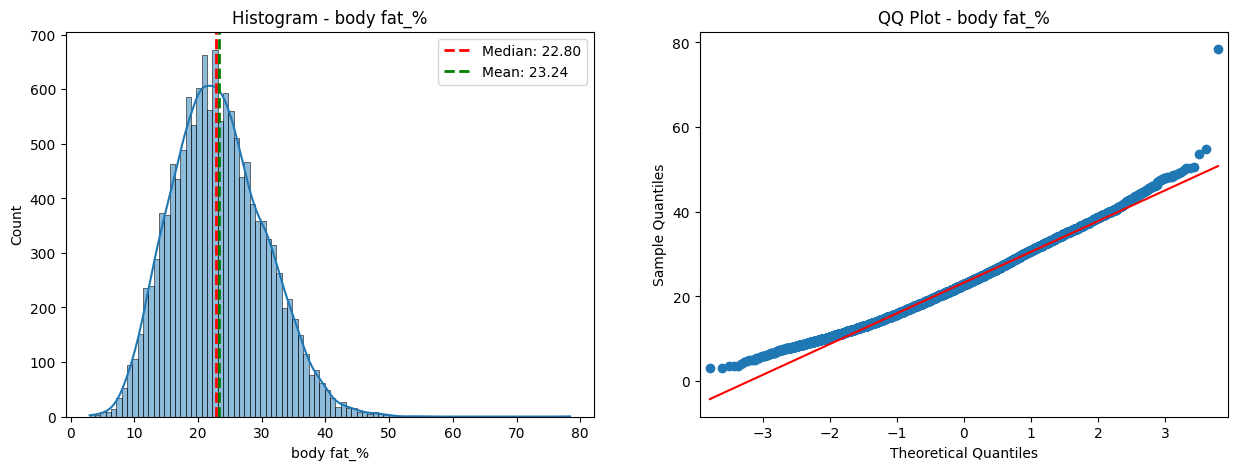

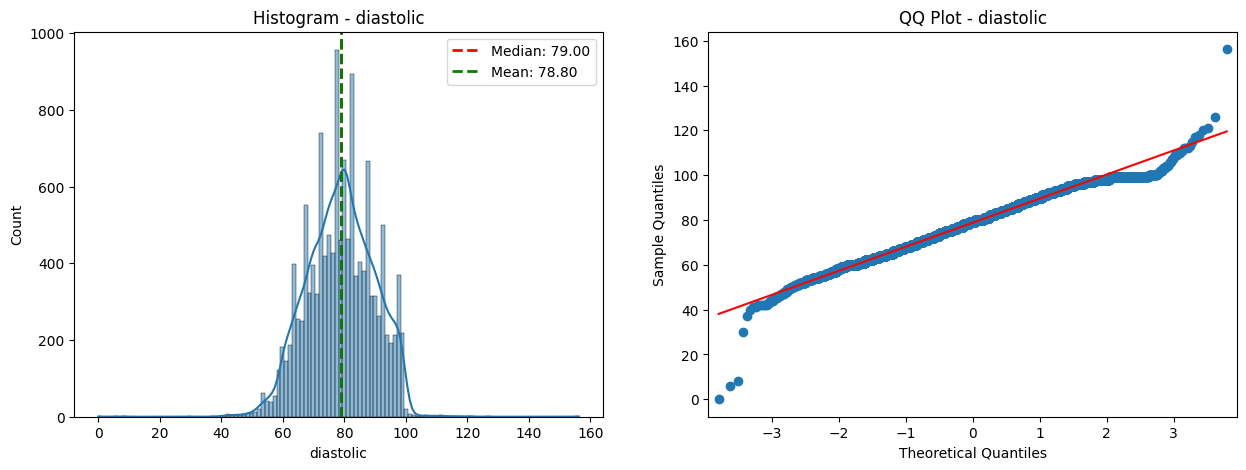

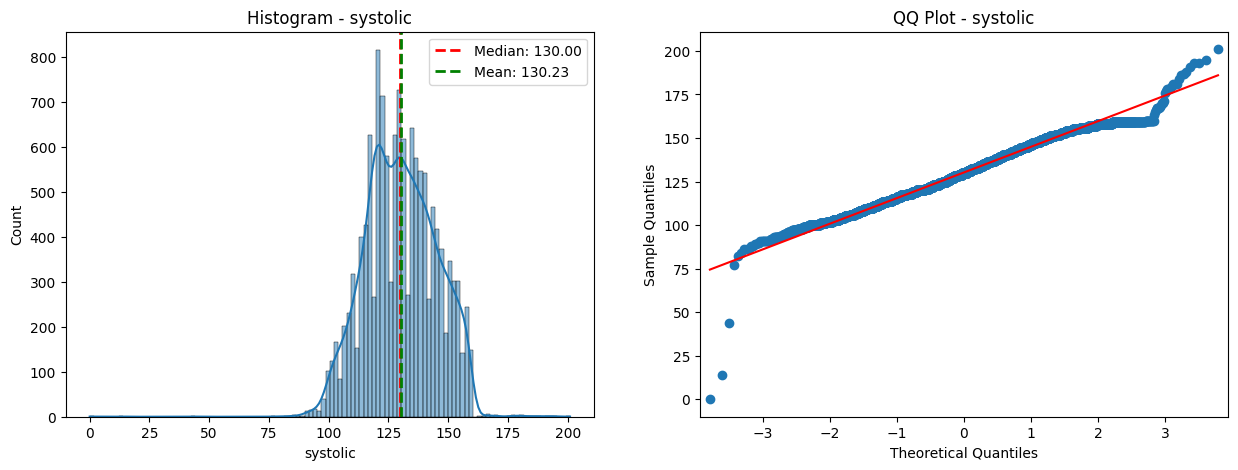

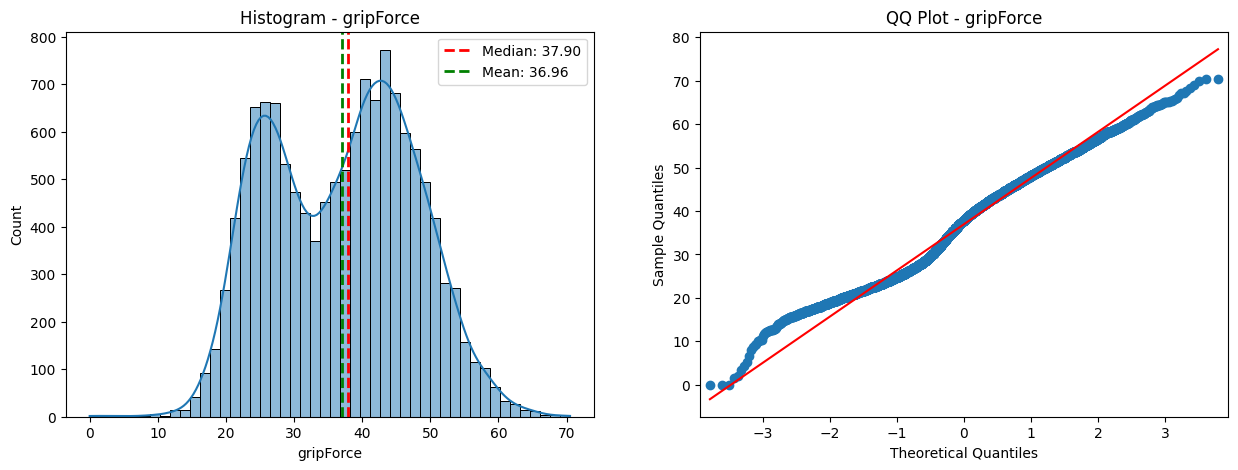

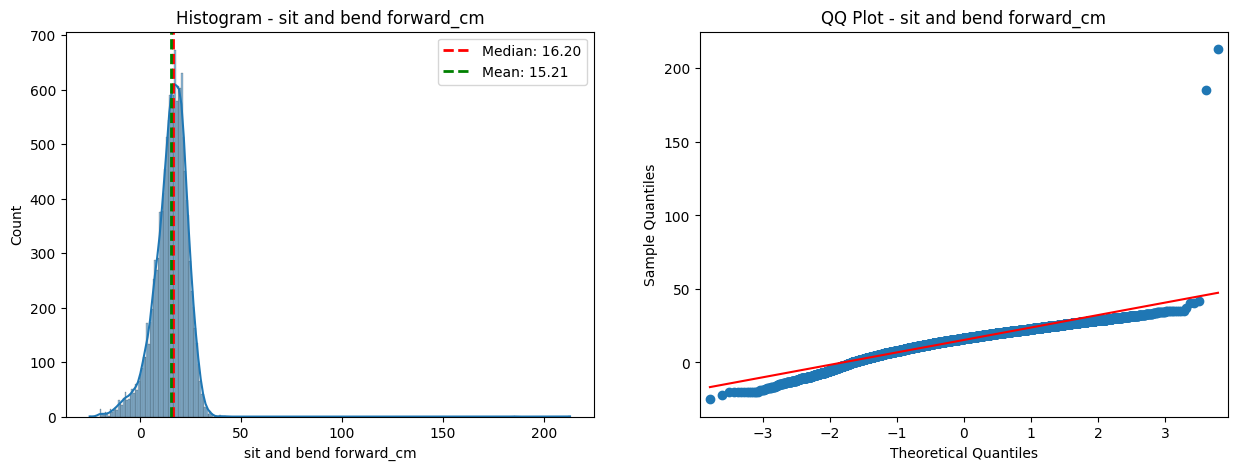

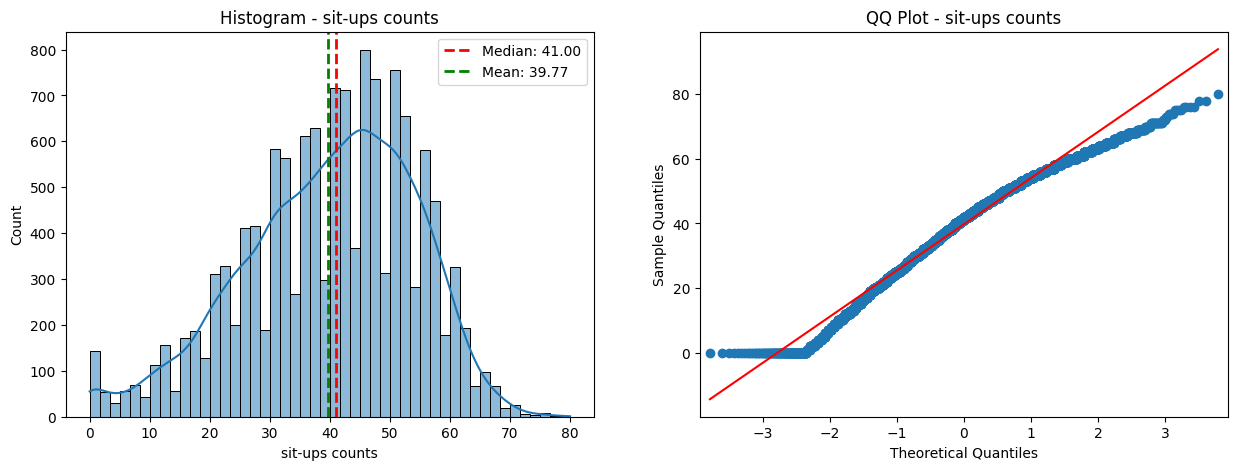

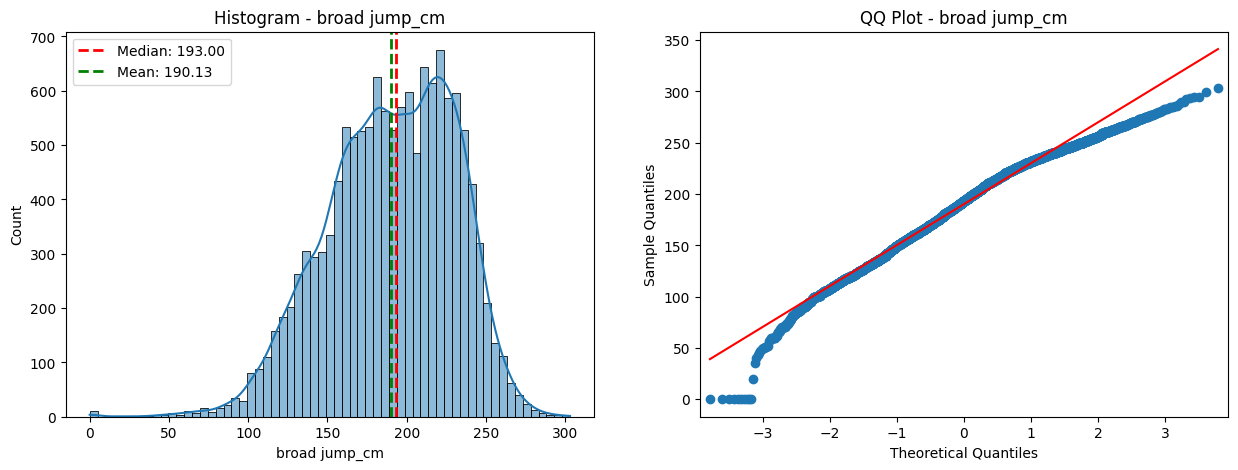

In [90]:
# histogram and QQ plot for each column
def plot_histogram_qqplot(data, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Histogram with median and mean reference lines
    sns.histplot(data[column], kde=True, ax=axes[0])
    median_val = data[column].median()
    mean_val = data[column].mean()
    axes[0].axvline(median_val, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[0].axvline(mean_val, color='g', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[0].set_title(f'Histogram - {column}')
    axes[0].legend()

    # QQ Plot
    sm.qqplot(data[column], line='s', ax=axes[1])
    axes[1].set_title(f'QQ Plot - {column}')

    plt.show()

# Iterate through columns and create plots
for column in numeric_data.columns:
    if column != 'class':
        plot_histogram_qqplot(numeric_data, column)

In [91]:
# Perform Shapiro-Wilk test on each column in cont_all_df: continuous variables
for column in numeric_data.columns[1:]:
    if column != 'class':
        stat, p = stats.shapiro(numeric_data[column])
        print(f"Shapiro-Wilk test for {column}:")
        print(f"  Statistic: {stat}")
        print(f"  p-value: {p}")
        print("")

        if p < 0.05:
            print(f"The {column} does not follow normal distribution")
            print("---------------------------------------------------------------------")
        else:
            print(f"The {column}follows normal distribution")
            print("---------------------------------------------------------------------")

Shapiro-Wilk test for height_cm:
  Statistic: 0.992914535476884
  p-value: 4.060913094983942e-25

The height_cm does not follow normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for weight_kg:
  Statistic: 0.9888618468509044
  p-value: 6.11955772015105e-31

The weight_kg does not follow normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for body fat_%:
  Statistic: 0.9911182765341456
  p-value: 6.034106960646935e-28

The body fat_% does not follow normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for diastolic:
  Statistic: 0.9905457552654107
  p-value: 9.343797775027522e-29

The diastolic does not follow normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for systolic:
  Statistic: 0.9888502675656531
  p-value: 5.923901005915953e-31

The systolic does not foll

### **Data Nomalization on Continuous variable**
- Since the continuous variables do not follow a normal distribution, we used four methods to normalize them as our purpose was to perform parametric tests on these variables.  

In [92]:
log_transformed_data = numeric_data.copy()

for column in numeric_data.columns:
    if column != 'class':
        log_transformed_data[column] = np.log(numeric_data[column] + 1)


print(log_transformed_data.head())

        age  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
0  3.332205   5.155024   4.333886    3.104587   4.394449  4.875197   4.023564   
1  3.258097   5.111988   4.039536    2.815409   4.356709  4.844187   3.621671   
2  3.465736   5.196285   4.369448    3.049273   4.532599  5.030438   3.824284   
3  3.496508   5.167639   4.278054    2.965273   4.343805  4.997212   3.747148   
4  3.367296   5.163642   4.229749    2.895912   4.262680  4.852030   3.795489   

   sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0                 2.965273        4.110874       5.384495     C  
1                 2.850707        3.988984       5.438079     A  
2                 2.564949        3.912023       5.204007     C  
3                 2.785011        3.988984       5.393628     B  
4                 3.335770        3.828641       5.384495     B  


#### Validating the distributions after log transformation

In [93]:
# Perform Shapiro-Wilk test on each column in cont_all_df: continuous variables
for column in log_transformed_data.columns[1:]:
    if column != 'class':
        stat, p = stats.shapiro(log_transformed_data[column])
        print(f"Shapiro-Wilk test for {column}:")
        print(f"  Statistic: {stat}")
        print(f"  p-value: {p}")
        print("")

        if p < 0.05:
            print(f"The {column} does not follow normal distribution")
            print("---------------------------------------------------------------------")
        else:
            print(f"The {column}follows normal distribution")
            print("---------------------------------------------------------------------")

Shapiro-Wilk test for height_cm:
  Statistic: 0.989240054978536
  p-value: 1.794667445388192e-30

The height_cm does not follow normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for weight_kg:
  Statistic: 0.9945105974665659
  p-value: 4.080953263462849e-22

The weight_kg does not follow normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for body fat_%:
  Statistic: 0.9835444672884516
  p-value: 1.7684876709875977e-36

The body fat_% does not follow normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for diastolic:
  Statistic: 0.9085857133410641
  p-value: 1.7292996510021154e-66

The diastolic does not follow normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for systolic:
  Statistic: 0.8767286867797763
  p-value: 1.1422145543849395e-72

The systolic does not 

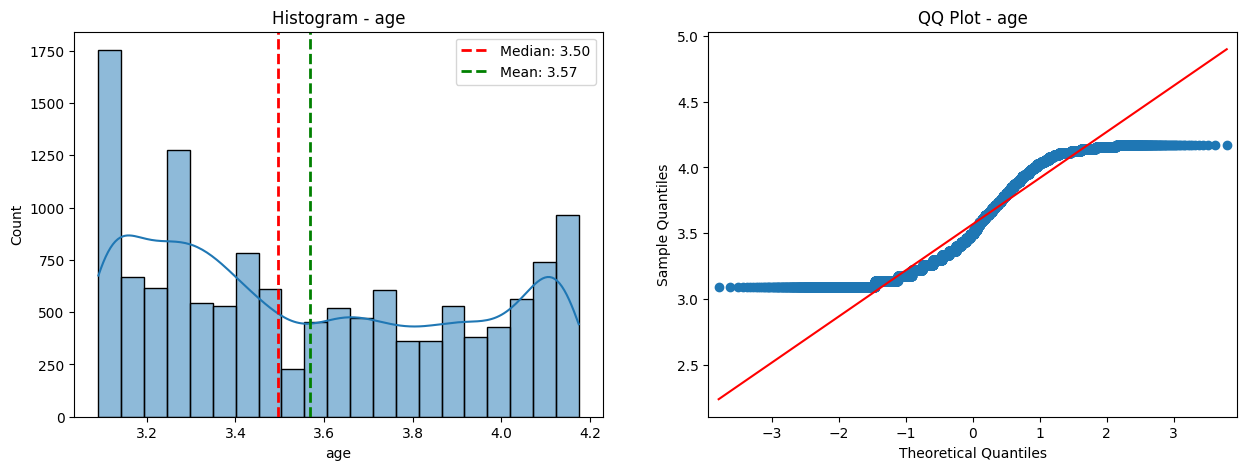

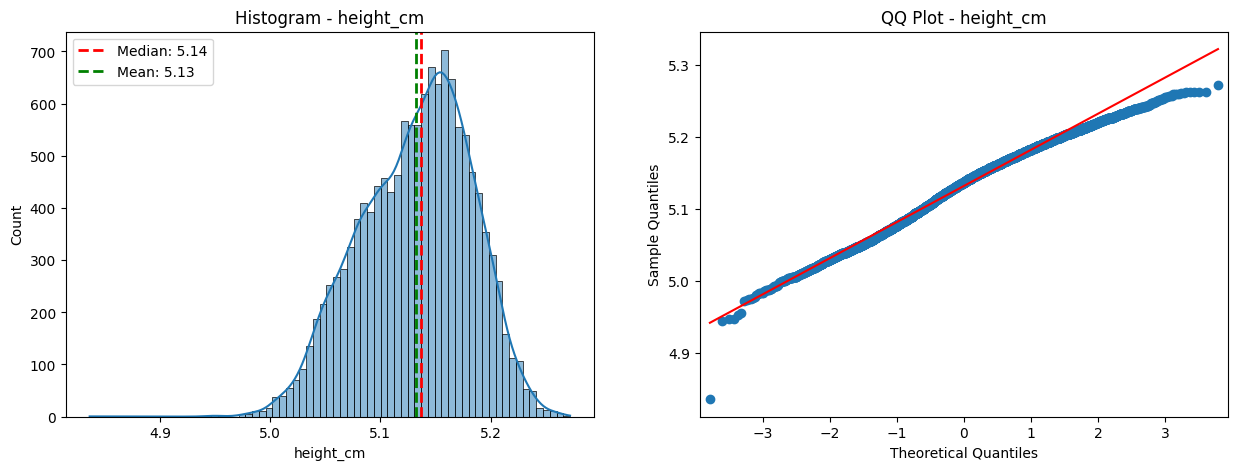

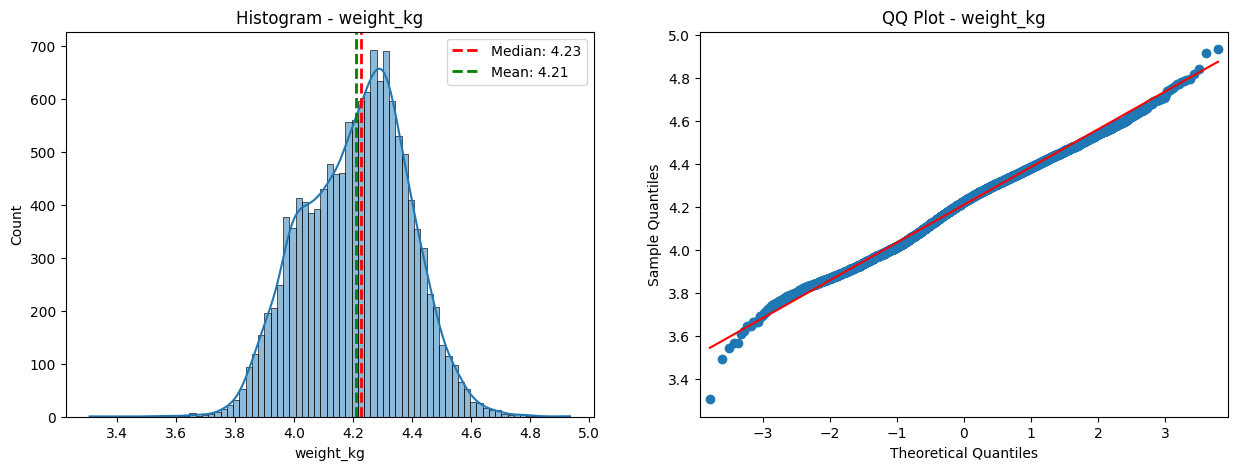

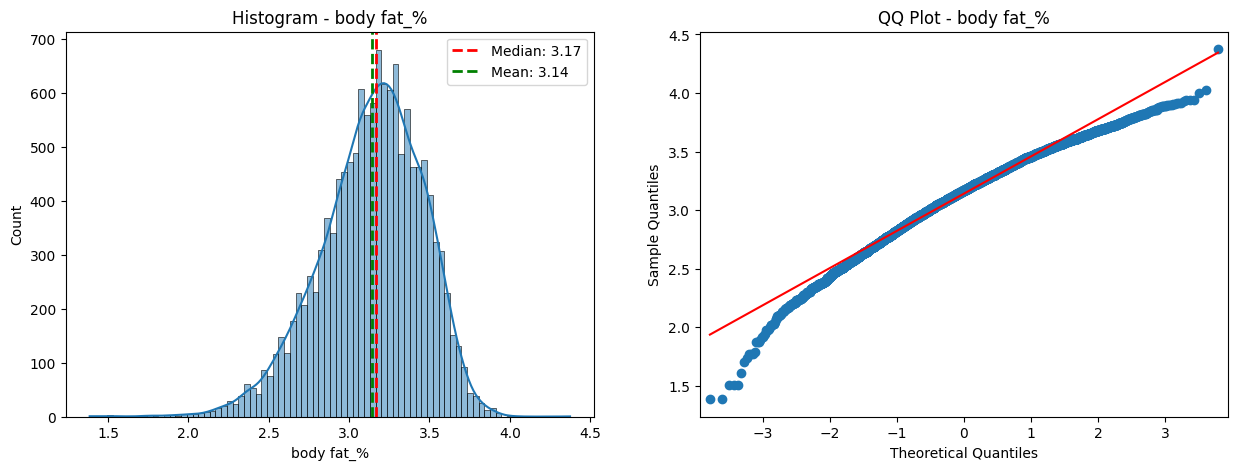

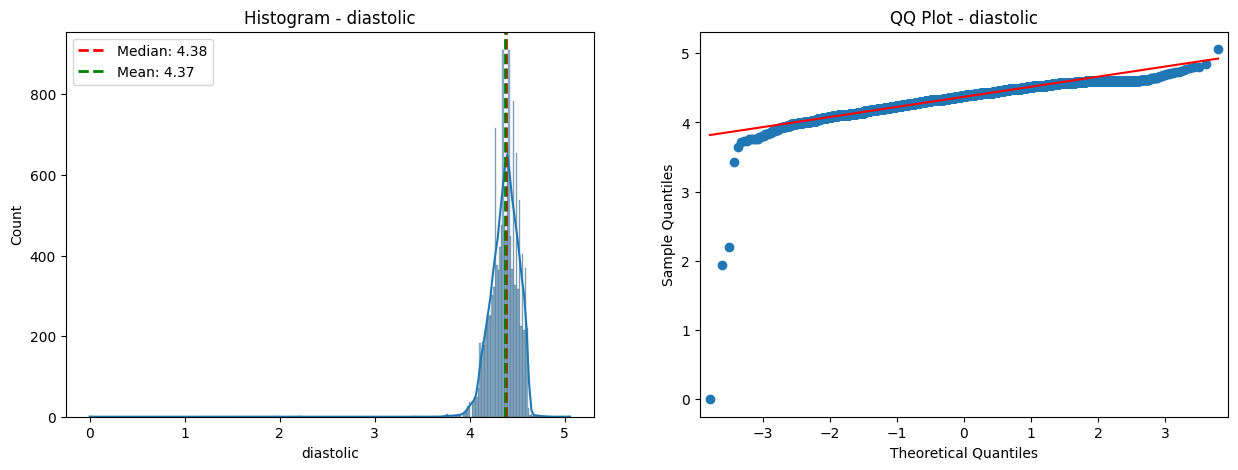

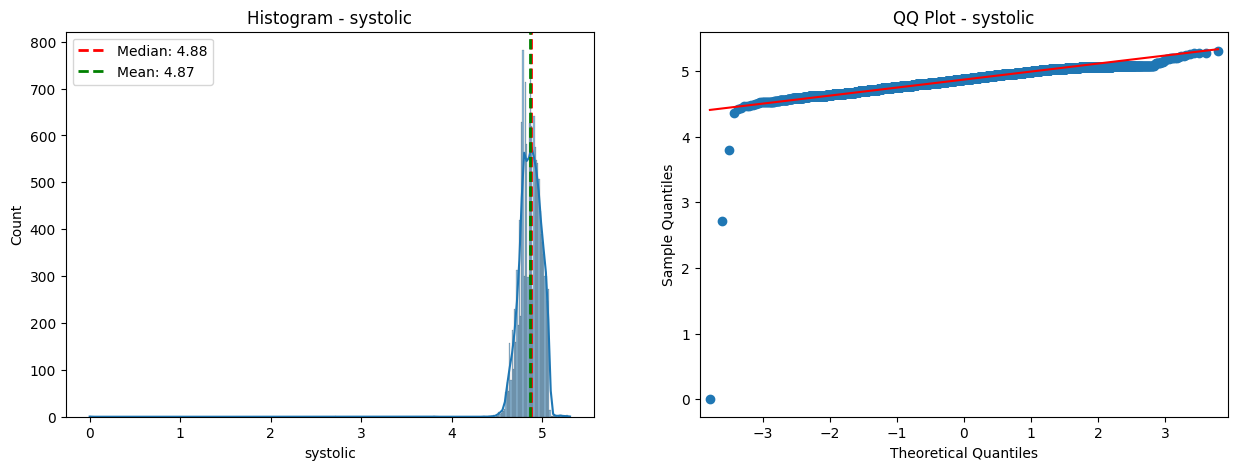

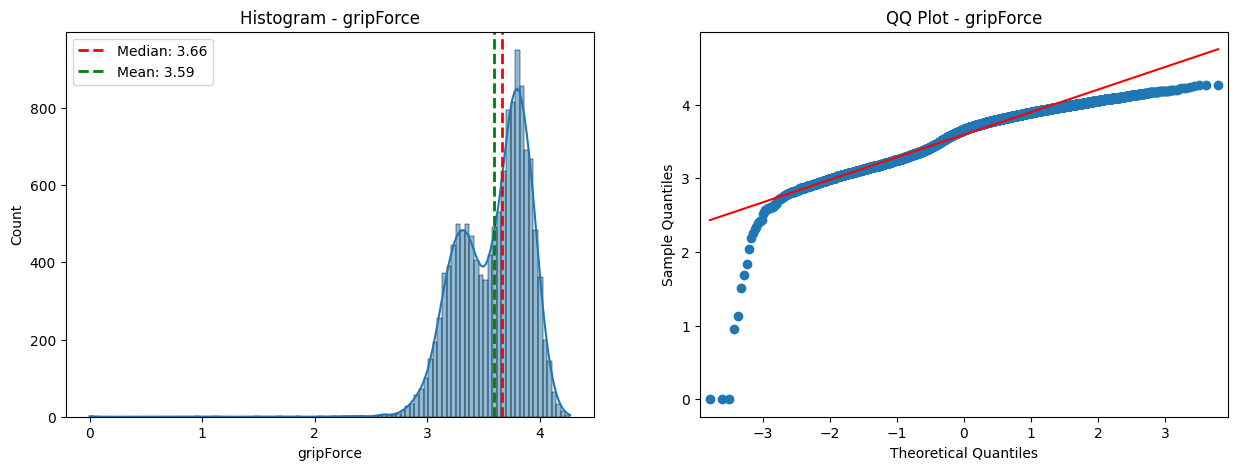

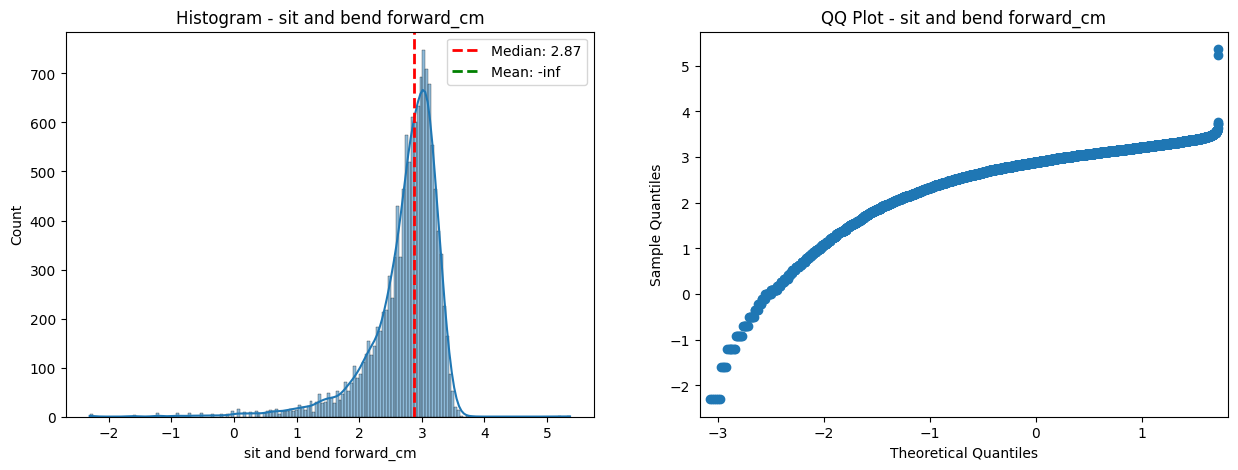

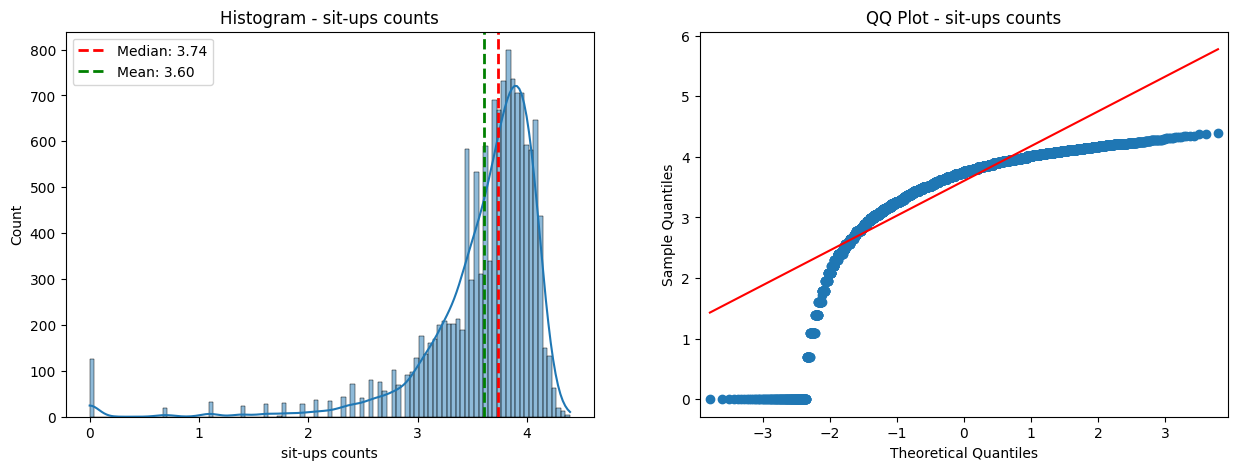

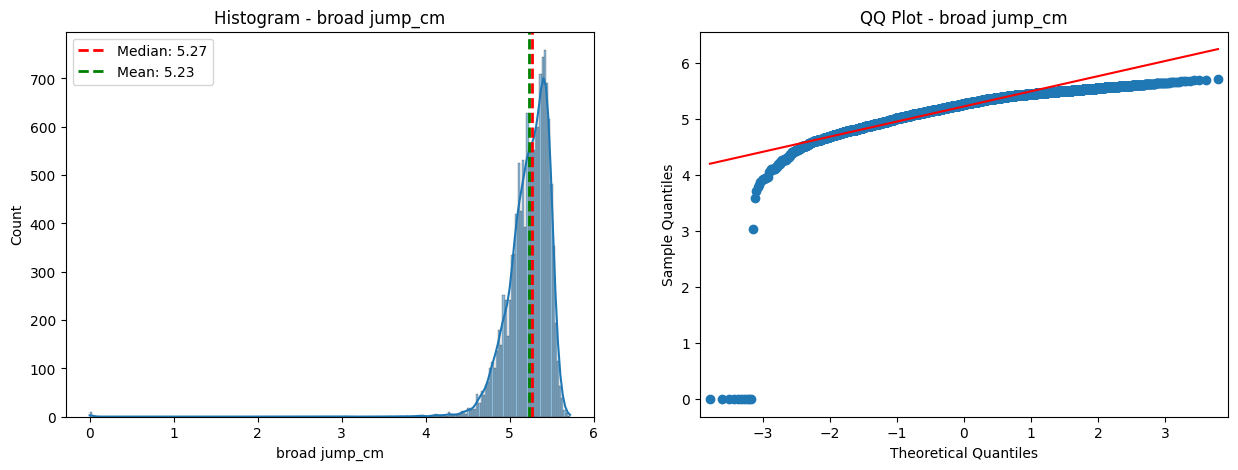

In [94]:
# histogram and QQ plot for each column
def plot_histogram_qqplot(data, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Histogram with median and mean reference lines
    sns.histplot(data[column], kde=True, ax=axes[0])
    median_val = data[column].median()
    mean_val = data[column].mean()
    axes[0].axvline(median_val, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[0].axvline(mean_val, color='g', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[0].set_title(f'Histogram - {column}')
    axes[0].legend()

    # QQ Plot
    sm.qqplot(data[column], line='s', ax=axes[1])
    axes[1].set_title(f'QQ Plot - {column}')

    plt.show()

# Iterate through columns and create plots
for column in numeric_data.columns:
    if column != 'class':
        plot_histogram_qqplot(log_transformed_data, column)

### Levene Test 
- To check the homogeneity, meaning if the variace are equal in two groups

In [95]:
# Conduct a levene test on cont_all_df to test homogeneity of variances.
numeric_data_temp = numeric_data.copy()
numeric_data_temp['class'] = numeric_data_temp['class'].map({"A":0, "B":1,"C":2,"D":3})

# Extract the numeric columns
numeric_cols = numeric_data_temp.columnsnu
# print(len(numeric_cols))

# Initialize empty lists to store results
levene_results = []

# Loop through each numeric column
for col in numeric_cols:

    # Perform Levene's test
    levene_statistic, levene_pvalue = stats.levene(numeric_data_temp[col][numeric_data_temp['class'] == 0]
                                                      ,numeric_data_temp[col][numeric_data_temp['class'] == 1],
                                                      numeric_data_temp[col][numeric_data_temp['class'] == 2],
                                                       numeric_data_temp[col][numeric_data_temp['class'] == 3]
                                                       , center = "median")
    # Store the results
    if levene_pvalue > 0.05:
      levene_results.append({'Variable': col, 'Levene Statistic': levene_statistic, 'Levene p-value': levene_pvalue, 'Homogeneity': 'Yes'})
    else:
      levene_results.append({'Variable': col, 'Levene Statistic': levene_statistic, 'Levene p-value': levene_pvalue, 'Homogeneity': 'No'})

# Create a DataFrame to display the results
levene_df = pd.DataFrame(levene_results)

# Print the DataFrame
print(levene_df.to_string())


                   Variable  Levene Statistic  Levene p-value Homogeneity
0                       age         29.006173    1.097940e-18          No
1                 height_cm         28.324868    2.996154e-18          No
2                 weight_kg         97.439828    2.179325e-62          No
3                body fat_%         39.604452    1.798444e-25          No
4                 diastolic          1.961710    1.173894e-01         Yes
5                  systolic          3.136481    2.434725e-02          No
6                 gripForce         19.620796    1.094807e-12          No
7   sit and bend forward_cm        597.243694    0.000000e+00          No
8            sit-ups counts        137.519060    9.354205e-88          No
9             broad jump_cm         18.396360    6.609023e-12          No
10                    class               NaN             NaN          No


In [113]:

# Create an empty DataFrame to store the results
variances_df = pd.DataFrame()

# Iterate over each numeric column
for col in numeric_data.columns:
    # Skip the target column
    if col == 'class':
        continue
    
    # Initialize a list to store variances for each group
    variances = []
    
    # Iterate over unique groups in the target column
    for group_label, group_data in numeric_data.groupby('class'):
        # Calculate variance for the current group and column
        variance = group_data[col].var()
        variances.append(variance)
    
    # Add variances as a column to the DataFrame
    variances_df[col] = variances

# Set the 'class' column as the index
variances_df.index = numeric_data['class'].unique()

# Print the DataFrame
print(variances_df)


          age  height_cm   weight_kg  body fat_%   diastolic    systolic  \
C  168.977335  61.432103  111.334962   41.416088  112.352579  218.133668   
A  187.807419  66.114732  118.315722   44.197405  113.624581  209.792310   
B  189.903169  72.634234  118.025800   39.353641  113.123564  210.809838   
D  192.094279  83.063843  192.555581   56.415028  120.049067  225.582164   

    gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
C  118.601966                26.254963      117.006549    1287.774016  
A  108.023075                34.893139      137.834805    1318.770720  
B  104.395616                34.620913      162.170502    1549.057474  
D  111.947866                88.262350      225.996417    1748.902779  


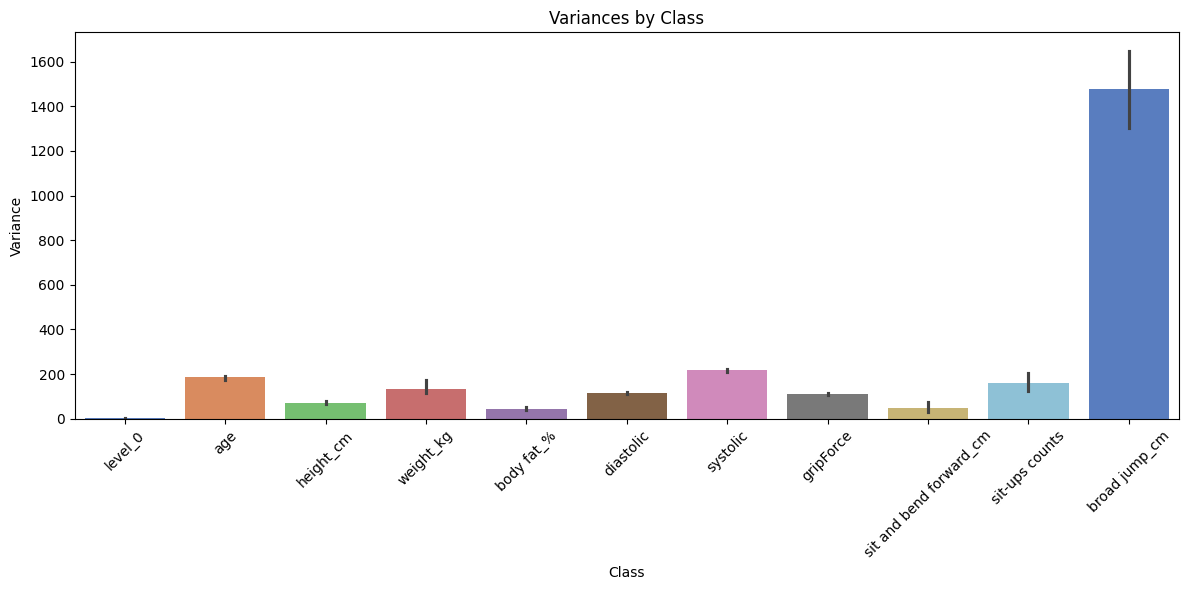

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(data=variances_df, palette="muted")

# Set plot title and labels
plt.title("Variances by Class")
plt.xlabel("Class")
plt.ylabel("Variance")

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


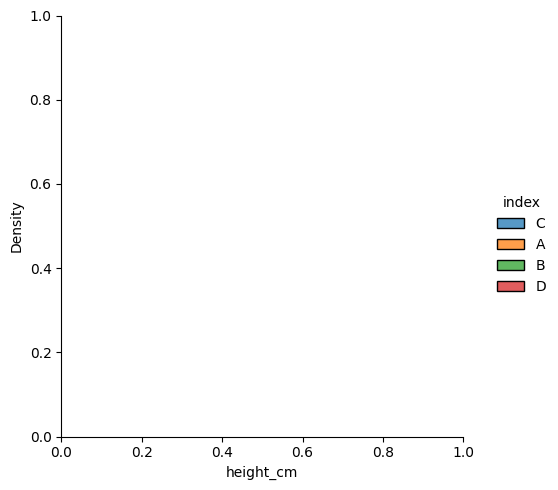

In [116]:
# variances_df.plot.density(figsize = (25, 10),linewidth = 3)
variances_df.reset_index(inplace=True)

# for i in variances_df.columns:
sns.displot(variances_df, x="height_cm", hue="index", kind="kde", multiple="stack")


##### Observation:
- We observed that only variable had equal variance rest had unequal variance. Therefore, we would continue to apply welch test which is an adaptation of the Student’s t-test for comparing the means of two independent groups, in the situation where the homogeneity of variance assumption is not met. The Welch t-test is also referred as: Welch’s t-test, Welchs t-test, t-test unequal variance, t-test assuming unequal variances or separate variance t-test

### Kruskal Walis Test

In [102]:
k_data = numeric_data.copy()

# k_data = tranformed_log[['class','height_cm','weight_kg', 'body fat_%']]

In [103]:
# class_a = k_data[k_data['class'] == "A"].drop('class', axis =1)
# class_b = k_data[k_data['class'] == "B"].drop('class', axis =1)
# class_c = k_data[k_data['class'] == "C"].drop('class', axis =1)
# class_d = k_data[k_data['class'] == "D"].drop('class', axis =1)

In [105]:
for column in k_data.columns[1:]:
    if column != 'class':
        t_statistic,p_value = kruskal(k_data[column][k_data['class'] == "A"],
                                                k_data[column][k_data['class'] == "B"],
                                                k_data[column][k_data['class'] == "C"],
                                                k_data[column][k_data['class'] == "D"])

        print(column)
        # Print or use the results as needed
        print(f"Kruskal T-test for {column}:")
        print(f"  T-statistic: {t_statistic}")
        print(f"  P-value: {p_value}")
        print("")

        if p_value < 0.05:
            print(f"The difference in {column} between survivors and non-survivors is statistically significant.")
            print("---------------------------------------------------------------------")
        else:
            print(f"There is no significant difference in {column} between survivors and non-survivors.")
            print("---------------------------------------------------------------------")


height_cm
Kruskal T-test for height_cm:
  T-statistic: 52.51940364551276
  P-value: 2.3211402579088126e-11

The difference in height_cm between survivors and non-survivors is statistically significant.
---------------------------------------------------------------------
weight_kg
Kruskal T-test for weight_kg:
  T-statistic: 578.1317556735229
  P-value: 5.546092222012791e-125

The difference in weight_kg between survivors and non-survivors is statistically significant.
---------------------------------------------------------------------
body fat_%
Kruskal T-test for body fat_%:
  T-statistic: 1698.0572379092227
  P-value: 0.0

The difference in body fat_% between survivors and non-survivors is statistically significant.
---------------------------------------------------------------------
diastolic
Kruskal T-test for diastolic:
  T-statistic: 76.88274524868663
  P-value: 1.4306091230403705e-16

The difference in diastolic between survivors and non-survivors is statistically significan

**Observation:**
- Based on the summary table of results above we can see the p values of the features are less than 0.05 level, concluding the difference between the mean values of groups A, B for each variable is statistically significant.  

### Other Test:
- We can perform the below tests but it would be inappropriate as the assumptions are not met.
- Therefore, the results are not reliable

#### One - way Anova Test
- Performed to determine the effect of a variable on one or two other variables by comparing their means. Especially when the categorical class has over two categories.
- During ANOVA testing, the hypothesis is:
   - H0: When all samples’ means are the same.
   - H1: When one or more samples are very much different.

Using the example we will check if weight_kg, has an effect on body fat_% and sit-ups counts using one-way ANOVA test.

In [106]:
from scipy.stats import f_oneway
class1 = numeric_data['weight_kg']
class2 = numeric_data['body fat_%']
class3 = numeric_data['sit-ups counts'] 
print(f_oneway(class1, class2, class3))

F_onewayResult(statistic=50205.485172216446, pvalue=0.0)


##### Observation:
- Since our p-value is 0, we dismiss the null hypothesis, as there exists no evidence sustainable enough to accept it.
- This means that the sample means are very different. Meaning that our H1 (alternate hypothesis) is true.